In [26]:
import elephant.conversion as conv
import neo
import quantities as pq
import numpy

import cPickle
f = open('closed','rb')
spikes = cPickle.load(f)
f.close()

In [27]:
import elephant

In [29]:
# convert from arrays to SpikeTrain
import neo 

csp = [neo.SpikeTrain(numpy.squeeze(sp)*pq.ms,t_start=0,t_stop=20000) for sp in spikes]


In [30]:
bsp = []
for neuron in csp:
    bsp.append(conv.BinnedSpikeTrain(neuron, num_bins=20000,t_start=0 * pq.ms,t_stop=20000 * pq.ms))

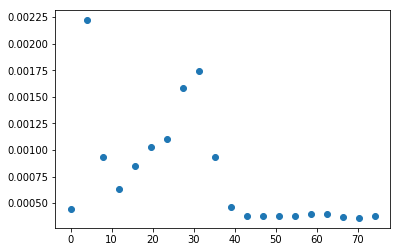

In [31]:
from scipy import signal

a=0

for st in bsp:
    x,y = signal.welch(st.to_array()[0],1000)
    a += numpy.squeeze(y)
        
import pylab
pylab.plot(x[:20],a[:20],'o')
pylab.show()



In [63]:
import elephant.spike_train_correlation

cc,lags = elephant.spike_train_correlation.cross_correlation_histogram(bsp[2],bsp[14],window=[-200,200])


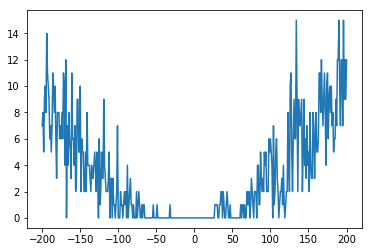

In [64]:
#pylab.hist(numpy.squeeze(cc),lags)
pylab.plot(lags,cc)
#pylab.ylim(0,200)
#pylab.xlim(-100,100)
pylab.show()

In [32]:
import matplotlib.pyplot as plt
import elephant.cell_assembly_detection as cad

patterns = cad.cell_assembly_detection(bsp[0], maxlag=2)[0]
# Plotting
plt.figure()
for neu in patterns['neurons']:
    if neu == 0:
        plt.plot(
            patterns['times']*binsize, [neu]*len(patterns['times']),
            'ro', label='pattern')
    else:
        plt.plot(
            patterns['times']*binsize, [neu] * len(patterns['times']),
            'ro')
# Raster plot of the data
for st_idx, st in enumerate(sts):
    if st_idx == 0:
        plt.plot(st.rescale(pq.ms), [st_idx] * len(st), 'k.',
                 label='spikes')
    else:
        plt.plot(st.rescale(pq.ms), [st_idx] * len(st), 'k.')
plt.ylim([-1, len(sts)])
plt.xlabel('time (ms)')
plt.ylabel('neurons ids')
plt.legend()
plt.show()


IndexError: list index out of range

In [38]:
import elephant.unitary_event_analysis as ue
UE = ue.jointJ_window_analysis(
    spiketrains, binsize=5*pq.ms, winsize=100*pq.ms, winstep=10*pq.ms, pattern_hash=[3])

ue.plot_UE(
        spiketrains, UE, ue.jointJ(0.05),binsize=5*pq.ms,winsize=100*pq.ms,winstep=10*pq.ms,
        pat=ue.inverse_hash_from_pattern([3], N=2), N=2,
        t_winpos=ue._winpos(0*pq.ms,spiketrains[0][0].t_stop,winsize=100*pq.ms,winstep=10*pq.ms))
plt.show()

NameError: name 'spiketrains' is not defined